In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from scipy.stats import kurtosis, skew, boxcox
from regressors import stats
from numpy import mean
from numpy import std
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
train = pd.read_csv('./data/train_filled_na_ord.csv')
test = pd.read_csv('./data/test_filled_na_ord.csv')

In [3]:
train.drop('Id', axis = 1, inplace=True)
test.drop('Id', axis = 1, inplace=True)

# Outlier Detection

In [4]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(train.loc[:, train.columns != 'SalePrice'])
X_Scaled = pd.DataFrame(X_Scaled, columns = train.columns[train.columns != 'SalePrice'])
y = train['SalePrice']

In [5]:
X_sm = sm.add_constant(X_Scaled)
model = sm.OLS(list(y),X_sm)
results = model.fit()

In [6]:
C, P = OLSInfluence(results).cooks_distance

In [7]:
outliers = pd.DataFrame(C[C > 1])
outliers.columns = ["Cook's Distance"]

In [8]:
# data_mean, data_std = mean(train), std(train)

In [9]:
# cut_off = data_std * 3
# lower, upper = data_mean - cut_off, data_mean + cut_off

# outliers = {}
# for col in ['LotFrontage','LotArea','MasVnrArea','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2',
#             'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF',
#            'OpenPorchSF','EnclosedPorch']:
#     m = train[col].between(lower[col], upper[col], inclusive=True)
#     outliers[col] = train[~m]
    
    

In [10]:
# outlier_indices = set()
# for col in outliers:
#     print(col, len(outliers[col]))
#     for idx in list(outliers[col].index):
#         #print(idx)
#         outlier_indices.add(idx)
        

In [11]:
train = train.drop(outliers.index, axis=0)

# Dropping Columns with all Zeroes

In [12]:
allZeroCols = train.columns[(train == 0).all()].to_list()
train = train.drop(allZeroCols, axis=1)
test = test.drop(allZeroCols, axis=1)

# Model Testing

In [13]:
def getFeatureImportance(num, cols, features_importances_, sort):
    
    feature_importances = zip(cols, features_importances_)
    sorted_importance = sorted(list(feature_importances),key= lambda x: abs(x[1]),reverse=False if sort == 'ascending' else True)

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_importance[:num]], [x[1] for x in sorted_importance[:num]])
    plt.xticks(rotation=90)
    
    return sorted_importance

In [14]:
X = train.loc[:, train.columns != 'SalePrice']
y = train['SalePrice']

## Random Forest

In [15]:
model = RandomForestRegressor()
params = {'n_estimators':[1000], 'max_features':['sqrt'], 'criterion':['mse']}
gridRf = GridSearchCV(model, param_grid=params, cv=5)
gridRf.fit(X, y)
print(gridRf.cv_results_)
print(gridRf.best_params_)
print(gridRf.best_score_)

{'mean_fit_time': array([3.09276319]), 'std_fit_time': array([0.16991297]), 'mean_score_time': array([0.12043009]), 'std_score_time': array([0.01393595]), 'param_criterion': masked_array(data=['mse'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['sqrt'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 1000}], 'split0_test_score': array([0.88868724]), 'split1_test_score': array([0.81142772]), 'split2_test_score': array([0.87301184]), 'split3_test_score': array([0.90054672]), 'split4_test_score': array([0.87255656]), 'mean_test_score': array([0.86924602]), 'std_test_score': array([0.03074343]), 'rank_test_score': array([1], dtype=int32)}
{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimator

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('TotalSF', 0.12242942896049847),
 ('TotalIndoorSF', 0.10055256092520437),
 ('GrLivAreaHighQualitySF', 0.05686401887418753),
 ('ExterQual', 0.053696778071535126),
 ('OverallQual', 0.05260044974031709),
 ('GarageCars', 0.04881362720054115),
 ('GrLivArea', 0.04376838779981662),
 ('KitchenQual', 0.03941353809326803),
 ('TotalBsmtSF', 0.03701188541467678),
 ('GarageArea', 0.034026868238153055),
 ('BsmtQual', 0.03380997972497125),
 ('YearBuilt', 0.03123565235872194),
 ('1stFlrSF', 0.028338341976981516),
 ('BsmtFinSF1', 0.021709300207901017),
 ('GarageYrBlt', 0.020608412474726497),
 ('Baths', 0.018636126180599785),
 ('YearRemodAdd', 0.017430359136545778),
 ('2ndFlrSF', 0.0156453563110194),
 ('FullBath', 0.01526881894212506),
 ('LotArea', 0.013219071191118911),
 ('MasVnrArea', 0.012629849469285226),
 ('FireplaceQu', 0.012578709686561142),
 ('Fireplaces', 0.010710679277700233),
 ('TotRmsAbvGrd', 0.009284779884978204),
 ('LotFrontage', 0.008523403565411621),
 ('hasFireplace', 0.008268743367256

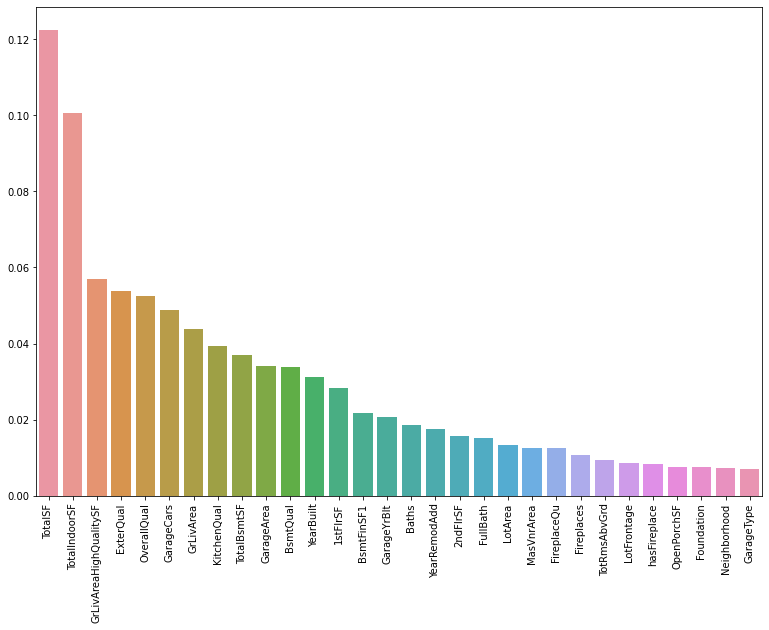

In [16]:
getFeatureImportance(30, X.columns, gridRf.best_estimator_.feature_importances_, sort='descending')

In [17]:
gridRf.score(X, y)

0.9829589526861073

## Gradient Boosting Regressor

In [18]:
model = GradientBoostingRegressor()
params = {'n_estimators': [500,600,700],
          'max_depth':[1,2,3,4,5],
          'max_features':['sqrt'],
          'subsample':[1,0.9,0.8,0.7], 
          'loss':['ls']}

gridGbr = GridSearchCV(model, param_grid=params, cv=5)
gridGbr.fit(X, y)
print(gridGbr.cv_results_)
print(gridGbr.best_params_)
print(gridGbr.best_score_)

{'mean_fit_time': array([0.21814566, 0.26459069, 0.28347921, 0.27208438, 0.25996399,
       0.35221267, 0.3547452 , 0.30533233, 0.31070881, 0.39241104,
       0.34090228, 0.31994858, 0.2827384 , 0.32429819, 0.30837827,
       0.29270515, 0.36058578, 0.40388346, 0.38875141, 0.40767078,
       0.50460644, 0.56787381, 0.49888387, 0.50610023, 0.43415604,
       0.45477433, 0.41308846, 0.39070458, 0.49841342, 0.484235  ,
       0.47925653, 0.43766737, 0.52724185, 0.63688259, 0.6104219 ,
       0.58501568, 0.5424737 , 0.4943902 , 0.43305182, 0.44645696,
       0.55416689, 0.58113022, 0.69291329, 0.53727703, 0.71958237,
       0.77099152, 0.85460587, 0.72369528, 0.62358179, 0.60062404,
       0.60696583, 0.6253994 , 0.76243329, 0.78775482, 0.76629524,
       0.71740689, 0.88087349, 0.76655884, 0.70315304, 0.65248227]), 'std_fit_time': array([0.00809518, 0.02496223, 0.02810881, 0.00874558, 0.02210353,
       0.00908897, 0.03062178, 0.01982513, 0.03707812, 0.01489259,
       0.0250022 , 0.00961

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('TotalSF', 0.18224972570994963),
 ('TotalIndoorSF', 0.15101835268883165),
 ('BsmtQual', 0.0823180919550363),
 ('GarageYrBlt', 0.06517415551531137),
 ('OverallQual', 0.05858627171215467),
 ('YearRemodAdd', 0.053216692647758364),
 ('GarageCars', 0.05040439989452878),
 ('BsmtFinSF1', 0.03846837077355903),
 ('Fireplaces', 0.03333762364277315),
 ('2ndFlrSF', 0.02800633173468043),
 ('KitchenQual', 0.024683530999057384),
 ('GrLivAreaHighQualitySF', 0.022274990881949844),
 ('ExterQual', 0.016569778608603668),
 ('GrLivArea', 0.01400991919823192),
 ('FullBath', 0.011117439872647425),
 ('LotArea', 0.010883064067600355),
 ('Neighborhood', 0.010230451982091642),
 ('hasFireplace', 0.00807575954847292),
 ('YearBuilt', 0.007882142397810838),
 ('Foundation', 0.007419273157828535),
 ('GarageArea', 0.00729493066695894),
 ('OpenPorchSF', 0.007259023107776419),
 ('1stFlrSF', 0.00695400815396332),
 ('GarageType', 0.006717459912276442),
 ('OverallCond', 0.006481447552516264),
 ('Baths', 0.00645941801515403

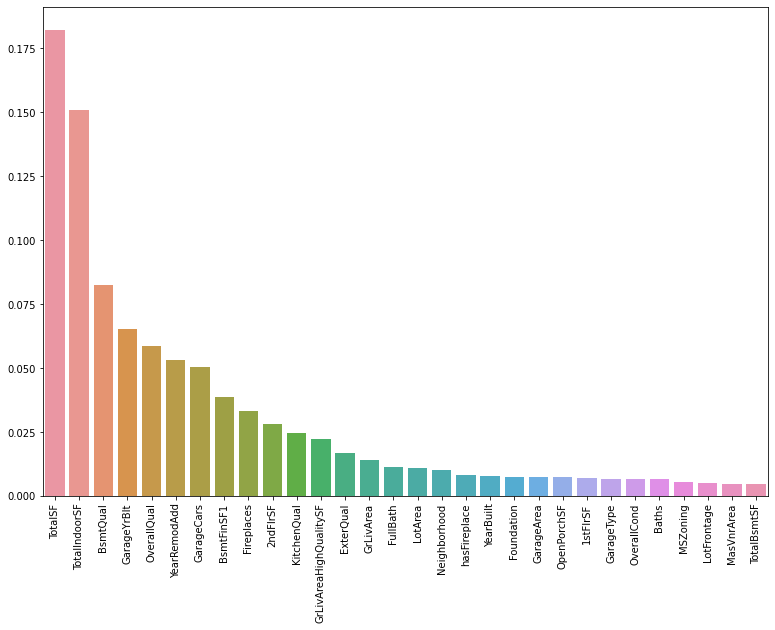

In [19]:
getFeatureImportance(30, X.columns, gridGbr.best_estimator_.feature_importances_, sort='descending')

In [20]:
gridGbr.score(X, y)

0.9892057329939907

# Test Predictions

In [21]:
gridGbr_predictions = gridGbr.predict(test)
gridGbr_predictions = pd.DataFrame(gridGbr_predictions)
gridGbr_predictions.index = gridGbr_predictions.index + 1461
gridGbr_predictions = gridGbr_predictions.rename(columns={0:'SalePrice'})
gridGbr_predictions = gridGbr_predictions.rename_axis('Id')


In [22]:
#gridGbr_predictions.to_csv('./submissions/submission12.csv')